# **Imports**

In [2]:
import os
os.chdir("../../..")
os.chdir(r"src")

from GloVe.weights import *
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from Axes.projection_functions import *
from Polarization.polarization_functions import *
import math
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

os.chdir("../")

# **On axis *Liberal VS Regulation***

## **Functions**

In [5]:
def get_quantiles(data, percentiles):
    """
    Get quantiles from a distribution.
    
    Parameters:
        data (array-like): The data.
        percentiles (array-like): The percentiles to compute (0-100).
    
    Returns:
        quantiles (array): The values at the specified percentiles.
    """
    return np.percentile(data, percentiles)

percentiles = [25, 75]

def plot_distribution(data, bins=10, title=''):
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## **Parliament**

### Choice of related articles

#### Test with 2017

In [11]:
df_proj = pd.read_csv('data/current_dataframes/df')
df_proj = df_proj[df_proj['source'] == 'par']

In [12]:
i = 7

In [13]:
df = standard_opening('data/FinalDataframes/FilteredFinalDataFrame_201'+str(i)+'.csv', True)
year = eval('201'+str(i))
df_proj_year = df_proj[df_proj['year'] == year].reset_index()
df = df[df['source'] == 'par'].reset_index()
df['cos axe'] = df_proj_year['cos axe 1']

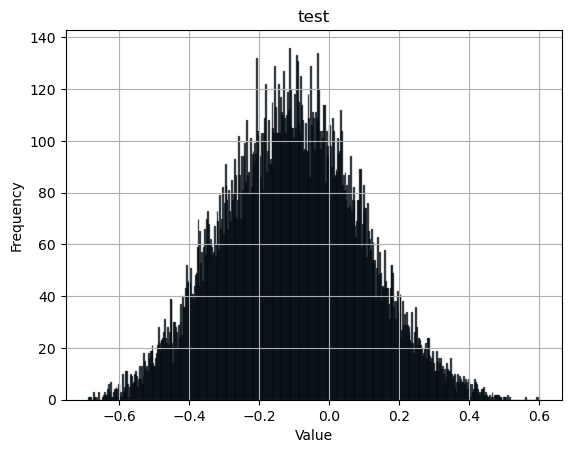

In [14]:
plot_distribution(df['cos axe'], bins = 500, title='test')

In [15]:
quantiles = get_quantiles(df['cos axe'], percentiles)

In [16]:
quantiles

array([-0.24495246,  0.03057575])

In [17]:
df = df.loc[(df['cos axe'] < quantiles[0]) | (df['cos axe'] > quantiles[1])]

In [18]:
party_1 = 'Lab'
party_2 = 'Con'

In [19]:
values = compute_polarization_and_CI(df, year, party_1, party_2)

#### Real loop 

In [4]:
party_1 = 'Lab'
party_2 = 'Con'

df_proj = pd.read_csv('data/current_dataframes/df')
df_proj = df_proj[df_proj['source'] == 'par']

In [10]:
real_pol = []
random_pol = []
CI_lows_real= []
CI_high_real = []
CI_lows_random= []
CI_high_random = []

for i in tqdm(range(10)) : 

    df = standard_opening('data/FinalDataframes/FilteredFinalDataFrame_201'+str(i)+'.csv', True)
    year = eval('201'+str(i))
    df_proj_year = df_proj[df_proj['year'] == year].reset_index()
    df = df[df['source'] == 'par'].reset_index()
    print(len(df), len(df_proj_year))
    df['cos axe'] = df_proj_year['cos axe 1']

    quantiles = get_quantiles(df['cos axe'], percentiles)
    print(quantiles)
    df = df.loc[(df['cos axe'] < quantiles[0]) | (df['cos axe'] > quantiles[1])]
    df = df[['year', 'party', 'text', 'Speaker']]

    values = compute_polarization_and_CI(df, year, party_1, party_2)

    real_pol.append(values[0])
    random_pol.append(values[1])

    CI_lows_real.append(values[2])
    CI_high_real.append(values[3])
    CI_lows_random.append(values[4])
    CI_high_random.append(values[5])

    print('Year 201'+str(i)+' computed')

  0%|          | 0/10 [00:00<?, ?it/s]

21832 21832
[-0.17808284  0.11301479]


  0%|          | 0/10 [00:17<?, ?it/s]


KeyboardInterrupt: 

In [23]:
df_pol_parliament = pd.DataFrame({'real polarization' : real_pol,
'random polarization' : random_pol,
'real low CI' : CI_lows_real,
'real high CI' : CI_high_real,
'random low CI' : CI_lows_random,
'random high CI' : CI_high_random })

df_pol_parliament.to_csv('data/polarization values/parliament polarisation values on Lib VS Reg', index=False)

real_pol = np.array(real_pol)
random_pol = np.array(random_pol)
CI_lows_real = np.array(CI_lows_real)
CI_high_real = np.array(CI_high_real)
CI_lows_random = np.array(CI_lows_random)
CI_high_random = np.array(CI_high_random)
x = [2010+i for i in range(len(real_pol))]

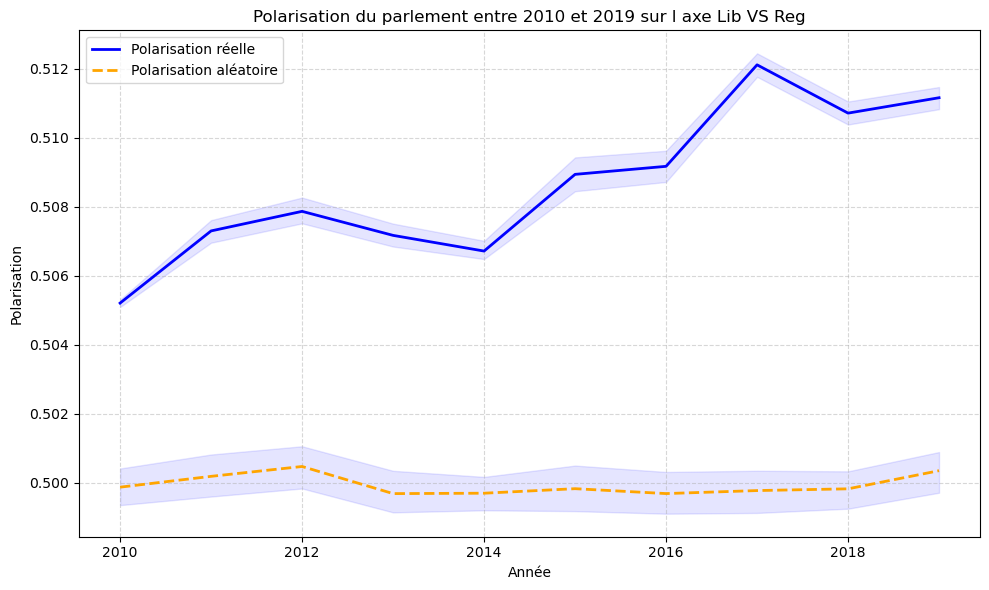

In [24]:
# Création du graphique
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

plt.plot(x, real_pol, label='Polarisation réelle', color='blue', linewidth=2)  # Tracé de la polarisation réelle
plt.fill_between(x, CI_lows_real, CI_high_real, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance
plt.plot(x, random_pol, label='Polarisation aléatoire', color='orange', linestyle='--', linewidth=2)  # Tracé de la polarisation aléatoire en pointillés
plt.fill_between(x, CI_lows_random, CI_high_random, color='blue', alpha=0.1)  # Remplissage de l'intervalle de confiance

plt.title('Polarisation du parlement entre 2010 et 2019 sur l axe Lib VS Reg')  # Titre du graphique
plt.xlabel('Année')  # Nom de l'axe des x
plt.ylabel('Polarisation')  # Nom de l'axe des y
plt.legend()  # Affichage de la légende
plt.grid(True, linestyle='--', alpha=0.5)  # Affichage de la grille en pointillés
plt.tight_layout()  # Ajustement automatique des marges
plt.show()  # Affichage du graphique